In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load tweets
df = pd.read_json('data/train_gold.json', lines=True)['categories']
df.head()

0     [yes]
1      [no]
2     [smh]
3    [wink]
4     [yes]
Name: categories, dtype: object

In [10]:
tag_nums = np.zeros(6)
for i in df:
    tag_nums[len(i)-1] += 1
print(tag_nums)

[23366.  5482.  1678.   827.   389.   258.]


In [11]:
def get_freq(data:pd.Series, *args)->pd.Series:
    freq = dict()
    for tags in data:
        for tag in tags:
            if tag not in freq:
                freq[tag] = 1
            else:
                freq[tag] += 1
    return pd.Series(freq).sort_values(ascending=False, *args)

<BarContainer object of 43 artists>

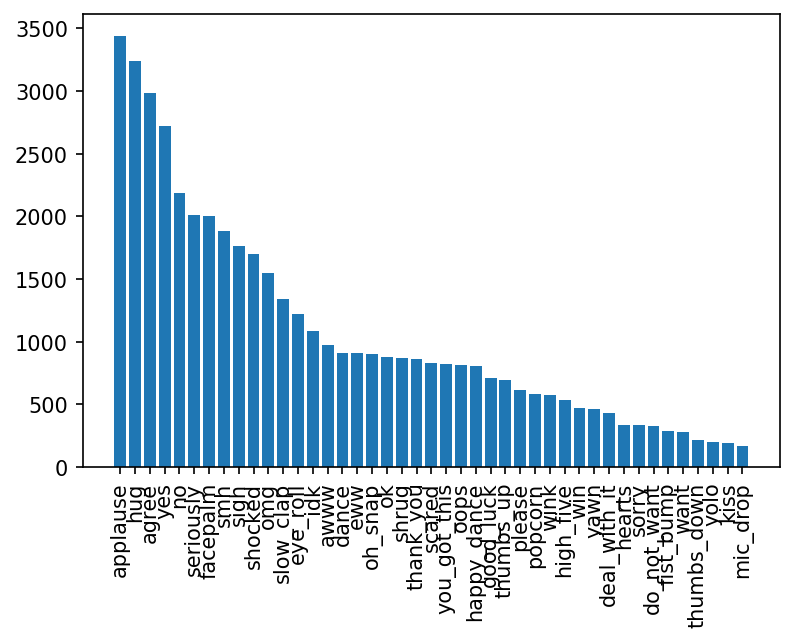

In [12]:
freq = get_freq(df)
fig, ax = plt.subplots(1, 1, dpi=150)
plt.xticks(rotation=90)
ax.bar(freq.index, freq.values)

看起来标签的分布有长尾效应，但是不确定测试集和训练集的采样是不是无偏的。如果两者服从同一分布则可以根据分析出的结果对算法进行相应的调整。

In [13]:
def get_correlation(data:pd.Series, keys:pd.Index)->pd.Series:
    corr = pd.DataFrame(np.zeros((len(keys), len(keys))), columns=keys, index=keys)
    for tags in data:
        for tag1 in tags:
            for tag2 in tags:
                corr.loc[tag1, tag2] += 1
    for i in keys:
        base = corr.loc[i, i]
        for j in keys:
            corr.loc[i, j] /= base
    return corr

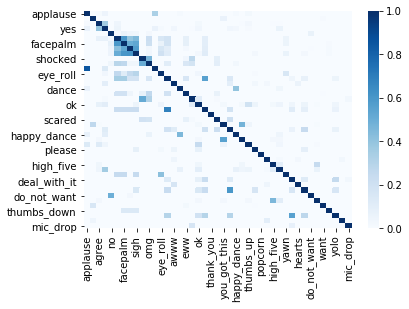

In [14]:
corr = get_correlation(df, freq.index)
sns.heatmap(corr, cmap='Blues')

一起出现频次比较高的为图中深色的点，考虑到tag长度为1的情况比较多，将这部分去掉重新算。

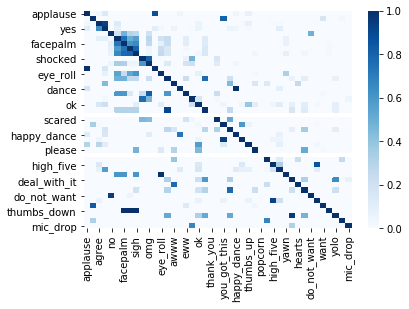

In [16]:
def get_correlation(data:pd.Series, keys:pd.Index)->pd.Series:
    corr = pd.DataFrame(np.zeros((len(keys), len(keys))), columns=keys, index=keys)
    for tags in data:
        if len(tags) <= 1:
            continue
        for tag1 in tags:
            for tag2 in tags:
                corr.loc[tag1, tag2] += 1
    for i in keys:
        base = corr.loc[i, i]
        for j in keys:
            corr.loc[i, j] /= base
    return corr
corr = get_correlation(df, freq.index)
sns.heatmap(corr, cmap='Blues')